## Sierpinski Triangle Implementation

This exercise is about implementing a **chaos game**.

>In mathematics, the term **chaos game** originally referred to a method of creating a fractal, using a polygon and an initial point selected at random inside it.

The instructions below take you step by step through the process of implementing and visualizing the simplest possible case of a Chaos Game, **Sierpinski's Triangle.**

Here is a description of how a Sierpinski triangle is generated, slightly edited from the [Wikipedia entry for Chaos Game.](https://en.wikipedia.org/wiki/Chaos_game)  Start with an equilateral triangle.  Then:

> The fractal is created by iteratively creating a sequence of points, starting with the initial point, randomly placed anywhere in the triangle, after which each point in the sequence is 1/2 of the distance between the previous point and one of the vertices of the triangle; the vertex is chosen at random in each iteration. Repeating this ... process a large number of times, selecting the vertex at random on each iteration, produces the fractal shape. 

This is the algorithm you will implement. The heart of the algorithm is a function we will call `get_next`, which has as its parameters the current point and the vertices and implements choosing a random vertex to generate the next point.  

There are other ways of generating fractal geometric figures.  What distinguishes Chaos Games is that the points are generated in random order so that the fractal structure emerges a different way each time the code is run, in a somewhat eerie fashion (see the animation on the Wikipedia page).

Implementation Steps:

1.  Implement a function `next_point` that takes 2 points, A and B, and a fraction, r, as parameters and returns a
    third point r  of the distance from A to B. So if r is .5, the new point will be halfway from A to B.
2.  Implement `get_next`, a function that calls `next_point`;  `get_next` takes the vertices of the triangle
    and the last point as arguments, chooses a random vertex, and uses `next_point` to return the point halfway 
    to the chosen vertex. 
3.  Implement the loop that iteratively generates points in the Sierpinski triangle and stores them in an
    array. You have to tell the loop when to stop by choosing how many points to generate: call that number `k`.
    70,000 is a good  value for `k`.  Don't worry.  That won't take very long.
4.  Implement the visualization code (in `matplotlib`) that draws the Sierpinski triangle you have created.
    This just calls the matplotlib axis method `ax.scatter` on the 70,000 or so points you've generated.

Let's step through what's going to happen in your code.

0. Initialization:

   a. `vertices = make_regular_polygon_set(n=3).T` (You'll be given the function `make_regular_polygon_set`)<br>
   b. `points = np.empty((k, 2))`.  Note:  `points[i,:]` will be the `(i+1)th` point generated.<br>
   c. `current = random_point_in_polygon(vertices)`. (You'll be given the function `random_point_in_polygon`)<br>
   <br>
1.  A loop of `k` iterations (`for i in range(k):`)<br>

    a.  Use `get_next` to find the new value of `current`.<br>
    b.  Add `current` to the array `points`<br>
    <br>
2.  Display the points in `points` using `matplotlib` (`ax.scatter(xcoords, ycoords)`).  You will want to size the 
    displayed points pretty small.  Use the `s` (for size) parameter of `ax.scatter`.
    Values less than 1 are accepted. Create the axis insance `ax` by  doing 
    
    ```python
    fig,ax = plt.subplots(1,1,figsize=figsize)
    ```
    
    (the `from matplotlib import pyplot as plt` import has been done for you in the code cell below).
    You will need to choose an appropriate figure size, say `(8,8)`.

### Implementation hints

**next_point ( p1, p2, r )**:  Return  this: `p1 + (r*(p2-p1))`. Remember `p1` and `p2` are numpy arrays.

**get_next ( current, vertices, frac )**:  `current` is the current point. To find the next point choose
a random vertex using `random.choice` from the python `random` module which has been imported for you in the
code cell below.  The function `random.choice`  returns a randomly selected item from any sequence.  For
example, here are ten randomly selected lower case ASCII letters.  You can re-execute the cell to get a different
selection:

In [41]:
import random

for _ in range (10):
    print(random.choice("abcdefghijklmnopqrstuvwxyz"),end="")

jdpqgcfdlt

If `v` is the randomly selected vertex, `get_next` should return a point `r` of the way from `current` to `v`,
where `r` is the appropriate `r` for generating a Sierpinski triangle (see the Sierpinski algorithm description  above).

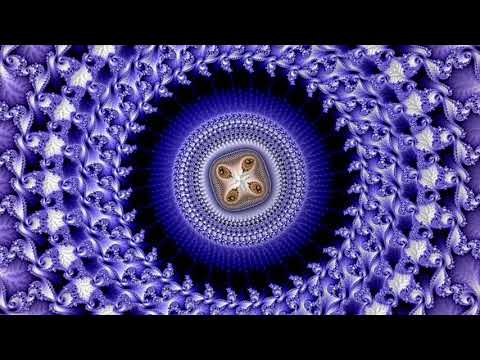

In [140]:
# FNd_WIf3lhU
from IPython.display import YouTubeVideo
YouTubeVideo('FNd_WIf3lhU')

The takeaway is that there is no bottom.  No matter how far in you zoom, there is densely detailed structure lying below.  

To demonstrate this same feature on our modest little fractal, zoom in on the top one-third of the triangle using the commented-out `ax.set_xlim()` and `ax.set_ylim()` commands at the bottom of the code cell.  You will see essentially the same picture but lighter and coarser in detail because the zoom has lost resolution.  You can regain that resolution by simultaneously increasing `k` (the number of points drawn) to 200,000.

The key parameter for this drawing is called `frac`, the fraction of the distance from the last point
to a randomly chosen vertex of the large triangle at which to place the next point.  The default
value of .5 generates the picture above.  Try changing `frac` to another number between 0 and 1
to get different pictures.  Be sure to experiment with values > .5 as well as values < .5.

**random_point_in_polygon ( vertices )**:  You are being given a definition of `random_point_in_polygon`.  However, there is a catch.  That function calls `next_point` several times.  So it won't work until you have correctly
implemented `next_point` (using the argument signature given above).  This is an example of working with code specs.   Other code is written that calls your code and your code is expected to behave  a certain way defined in the code specs.  

#### The code skeleton

Use the code and the imports in the cell below as your starting point.  Follow the implementation hints
above.  Happy coding.  One more hint follows this cell.

In [26]:
from matplotlib import pyplot as plt
import numpy as np
import random

# For xkcd colors see https://xkcd.com/color/rgb/
color_schemes = dict(xkcd1 = ("xkcd:pale salmon","k","xkcd:brick","xkcd:nice blue"),
                     spectral= "red orange yellow green blue indigo violet".split(),
                     default = ("r","k","r","c"),
                     with_brick = ("r","k","xkcd:brick","c"))

def make_regular_polygon_set (n,radius=1):
    """
    Much simplified version of make_regular_polygon_set
    """
    thetas = get_thetas_for_regular_polygon(n=n)
    xs = radius * np.cos(thetas)
    ys = radius * np.sin(thetas)
    return make_vector_seq(xs,ys)


def make_vector_seq (xx,yy,add_component3=False):
    """
    xx and yy are 1D aligned x and y coords; Return the corresponding
    vector seq array M: M[0,j] = xx[j]; M[1,j]=yy[j]
    
    This configures the points as a "vector seq"
    suitable to apply a 2D linear transformation array to.
    """
    if add_component3:
        component3 = np.ones((len(xx),))
        return np.concatenate([xx[np.newaxis,:],yy[np.newaxis,:],
                               component3[np.newaxis,:]],axis=0)
    return np.concatenate([xx[np.newaxis,:],yy[np.newaxis,:]],axis=0)


def get_thetas_for_regular_polygon (n):
    """
    W/o loss of generality: Assuming there's a vertex at theta=pi/2.
    Can always rotate to render a different orientation.
    """
    twopi= 2 * np.pi
    delta = twopi/n
    if n > 3:
        tmax = np.pi/2 + (n-1)*delta
    elif n == 3:
        tmax = np.pi/2 + n*delta
    else:
        raise Exception("There are no polygons with fewer than 3 sides.")
    return np.arange(tmax%twopi,tmax,delta )


def get_thetas_for_regular_polygon2 (n,ref=np.pi/2):
    """
    Default reference vertex: Assuming there's a vertex at theta=pi/2.
    Else user chosen.
    """
    twopi= 2 * np.pi
    ref=ref%twopi
    delta = twopi/n
    if n > 3:
        tmax = ref + (n-1)*delta
    elif n == 3:
        tmax = ref + n*delta
    else:
        raise Exception("There are no polygons with fewer than 3 sides.")
    return np.arange(ref,tmax+delta,delta )

def plot_edges(vertices,ax,c=None):
    us,vs = vertices[:,0],vertices[:,1]
    us = np.concatenate([[us[-1]],us])
    vs = np.concatenate([[vs[-1]],vs])
    ax.plot(us,vs,c=c)
    
def color_scatter (xs,ys, cols, ax, k, s=.1):
    splt = k//len(cols)
    # Throw in some fall coloring
    for i in range(len(cols)):
        stt,stp = i*splt,(i+1)*splt
        ax.scatter(xs[stt:stp],ys[stt:stp],s=s,c=cols[i])


def random_point_in_polygon(vertices):
    """
    Assumption: A line connecting two non-vertex points 
    on two distinct edges of our polygon is an internal point (not on a side or vertex).

    Note: this means we assuming a CONVEX polygon.  
    
    Method.  Pick a random point X1 on a random edge; then pick random 
    point X2 on a second randomly chosen edge (except that it cant be 
    the edge X1 is on).  Return a random point on the line connecting X1 
    and X2.
    
    Issue.  We are assuming a regular polygon?  If the
    sides are of different lengths, is this unbiased?
    
    Concern this may havbe a bias away from the center
    """
    n=len(vertices)
    v_idx1 = random.choice(range(n))
    # The vertices of our first randomly chosen edge
    v1,v2 = vertices[v_idx1],vertices[(v_idx1+1)%n]
    v_idx2 = random.choice(range(n))
    while v_idx2 == v_idx1:
        v_idx2 = random.choice(range(n))
    # The vertices of our second randomly chosen edge
    v3,v4 = vertices[v_idx2],vertices[(v_idx2+1)%n]
    # There will be 3 lines; we need random points on each
    frac1,frac2, frac3 = random.random(),random.random(),random.random()
    # random points on sides connecting v1 to v2,v3 to v4
    x1 = next_point (v1,v2,frac1)
    x2 = next_point (v3,v4,frac2)
    # Return random point on ray from x1 to x2.
    return next_point(x1,x2,frac3)

**Test your code when you have partial results**.  For example, you can test `next_point` 
by generating your two  favorite points, P1 and P2, and drawing the line between them and scattering
a point that `next_point` creates that is supposed to fall on that line, using code something like the following:

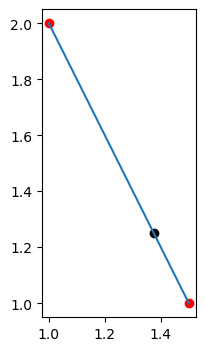

In [42]:
from matplotlib import pyplot as plt
import numpy as np
fig, ax = plt.subplots(1,1,figsize=(4,4))
# This overrules whatever you said in figsize to draw the slopes accurately.
# Try commenting the next line out and re-executing to demonstrate
ax.set_aspect("equal")

P1,P2 = np.array([1,2]),np.array([1.5,1])
# Stack to make getting xcoords and ycoords easier
points = np.stack([P1,P2],axis=0)
xcoords,ycoords = points[:,0],points[:,1]

# Show the points
ax.scatter(xcoords,ycoords,c="r")
# Show the line connecting the points
ax.plot(xcoords,ycoords)
P3 = next_point(P1,P2,.75)

#  Show P3.  Does it fall on the line as it should?
#  Does it fall 3/4 of the way from P1 (1,2)  to P2 (1.5,1)
ax.scatter([P3[0]],[P3[1]],c="k")

An additional test of `next_point`.  Use `make_regular_polygon_set (n)` to make a regular polygon (doesnt have to be a triangle) Draw it using `plot_vertices` (supplied in the code above), paying attention to what the code expects and the hints above regarding how to initialize the variable `vertices`.  Then call  `random_point_in_polygon(vertices)` and plot the new point (using `scatter`).  See if the new point is inside the polygon you draw.  Why is this relevant to testing `next_point`?  Because `random_point_in_polygon(vertices)`
calls `next_point`.  This will verify not only that `next_point` works but that it is called as the other code expects it to be called and returns what the other code expects it to return.  

If this test works, execute the code cell repeatedly to see the random point jump around, always remaining inside the polygon.

In [ ]:
# Additional test code here.

# Create axis instance

# Create polygon

# Draw polygon

# Choose random point

# Draw random point

### The plot

Here is what your plot should look like.  If you execute the code cell below the picture it will
disappear.  You can of course find another picture on the Wikipedia page.  You might want to arrange your coding
so as not to disturb this cell, so you can compare your picture to it.

The red outline is not part of the assignment; that is it's not created by the algorithm.  It's the actual triangle and it's drawn by calling `plot_edges(vertices,ax,c="r")`.

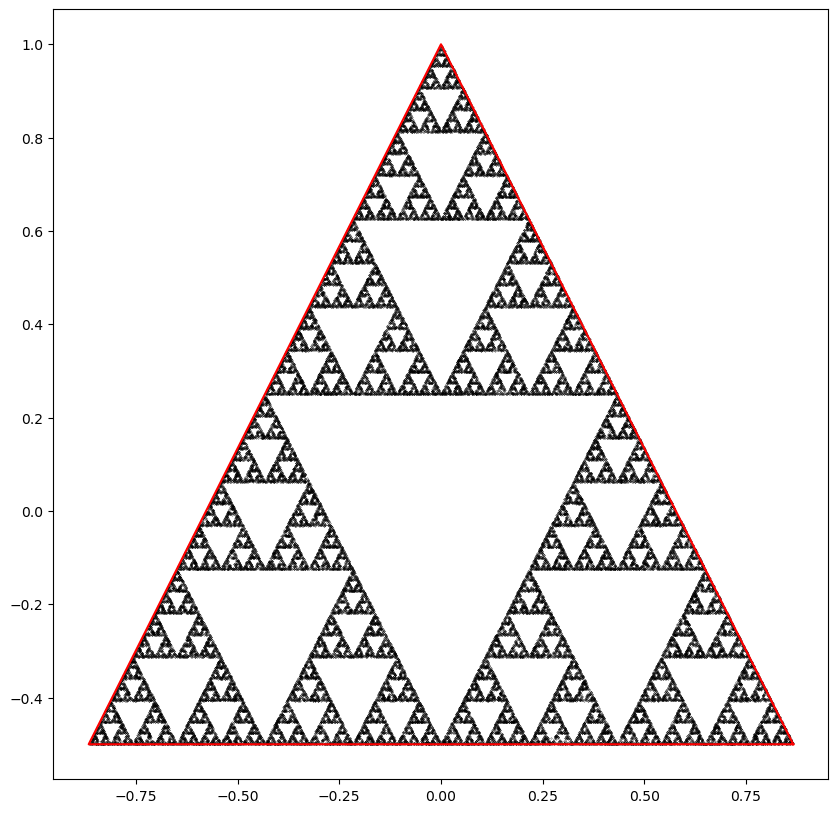

The first point of interest is that fractal structure is being created: The large triangle (call this Rank 0) is made up of three smaller triangles (call this Rank 1) filled with still smaller triangles (Ranks 2 and up) arranged around one empty (inverted) triangle in the center.  Each Rank 1 triangle is a smaller copy of the Rank 0 triangle, meaning that each of those Rank 1 triangles contains perfect copies of themselves, and so on, in an infinite regress. This feature is called **self-similarity**.  By counting the number of different sizes of empty triangles shown (for example right along the right leg of the Rank 0 triangle), you can see that ranks 0-5 are shown in the picture,  but what  makes this fractal structure is that the Sierpinski triangle in fact generates copies of itself at an infinite number of ranks.  

### Optional for the adventurous (Sierpinski pentagon)

The next picture is a Sierpinski pentagon. It has fractal structure in exactly the same way the Sierpinski
triangle.

Of course the first key change is that the polygon inside which we're choosing points has `n=5` sides.
The other key change is that a value other than .5 is used for `frac`.  It turns out  that when `n=5`, the optimal `frac` value for  packing the polygons (the value which allows the inner polygons to be just large enough to touch without overlapping) is approximately  .618.  How this number is arrived at as a function of `n` is discussed in the Wikipedia article.  It's not hard, but it's also not pretty.

If you're wondering why we skipped `n=4`, that too is discussed in the Wikipedia article.  There are interesting things that emerge when  `n=4`, but they're less straightforward.  The pictures further on in this notebook are all generated by games described in the Wikipedia aricle.  They are roughly arranged in increasing order of difficulty but none of them are very difficult to implement.

If you're really feeling adventurous, you might try inventong a chaos game of your own. That turns out not bo so easy.   The example of Barnaby's Fern (given at the end, along with the code to draw it) is an example of how far afield you might have to wander.

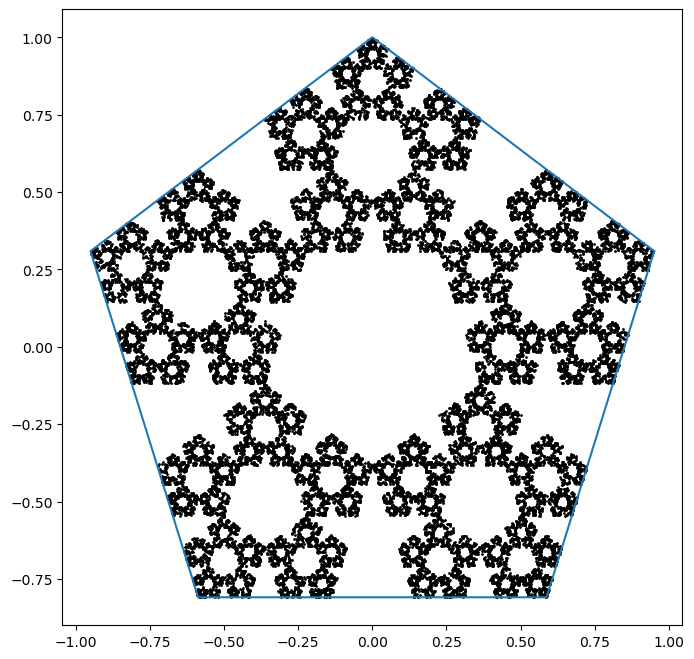

##  Sierpinski's mini-demons

The algorithm above.   Initialize with a random point P. 

Choose a random vertex `V`.  Choose the next `P` to lie `frac` of the distance from `P` to `V`.  Rinse
and Repeat,

The plot below uses exactly this algorithm except that the last `V` is excluded from being next `V` and `frac`=.5.  In other words you can't use the same vertex two times in a row in selecting the next point,  The size of the scatter points has also been reduced to make the plot less crowded.   

A comment:  intuitively what might happen with this constraint enforced is that you would get a subset of the points in the Sierpinski pentagon.  But it's very clear from the picture that that's **not** what happens.  So much for intuition.  What's going on here has to do with the notion an **attractor**.  The set of points in a Sierpinski set is an attractor.  Once you get near a point you're very likely on the next iteration to get nearer still until finally you are sucked in completely; as long as you follow the rules of the Chaos Game, you move only among Sierpinski points or very nearby, where you get sucked in again.  But if you're not following those rules the probabilities change; the Sierpinksi points are no longer attractors; and you may find that a completely different set of points are attractors.

Try changing the value of `frac` again.

(2, 5)

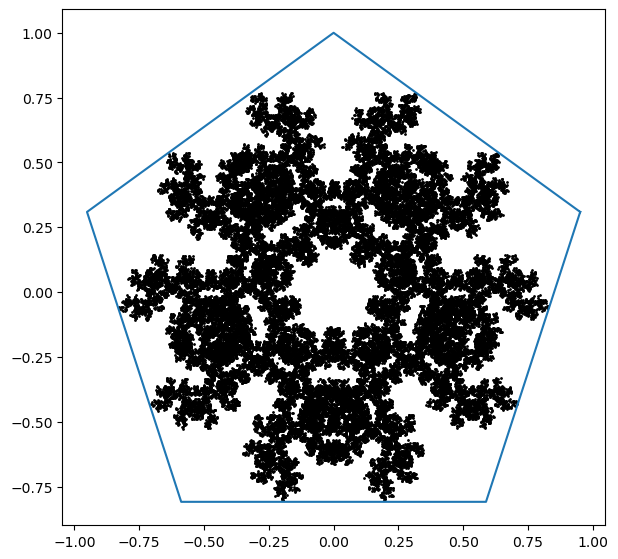

## Frac-values greater than 1

Here The points are placed outside and on the inner
edges of the original pentagon, which is shown in red.  Still seeing fractal structure, just taking up a little more room.

However `frac` value matters. Try `frac=2` with `use_colors = False` (the default, which renders the points in black) and look for the original pentagon, which will still be drawn in red and centered on the origin. You might try several runs in a row with `frac=2`.  Observe what happens with the layout.  Looking at these `r=2` layouts may suggest to you where the name **chaos game** came from.  Finally, try setting `use_colors` to `True` when you try `r=2`.  The colors given are in spectral order, so the closer to the red end of the spectrum, the earlier the points were created, the closer to violet the later.  

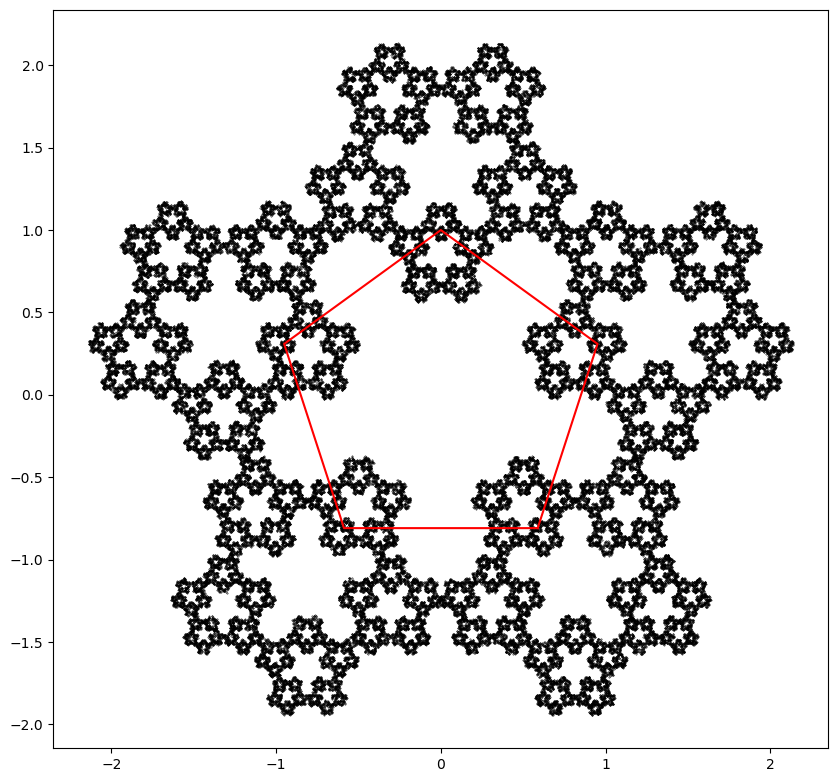

## Vicsek fractal

Add a "vertex" at the origin, making it a point that can be jumped to.  Set `n=4` and `frac=.667`.

Try setting `n=5`, and `n=7`.  Also try `n=4; frac=1.4`.

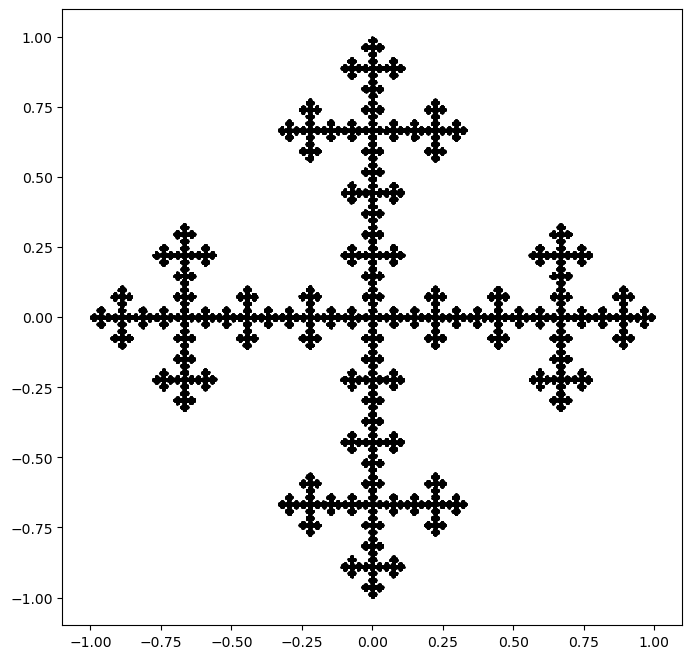

## Sierpinski's carpet

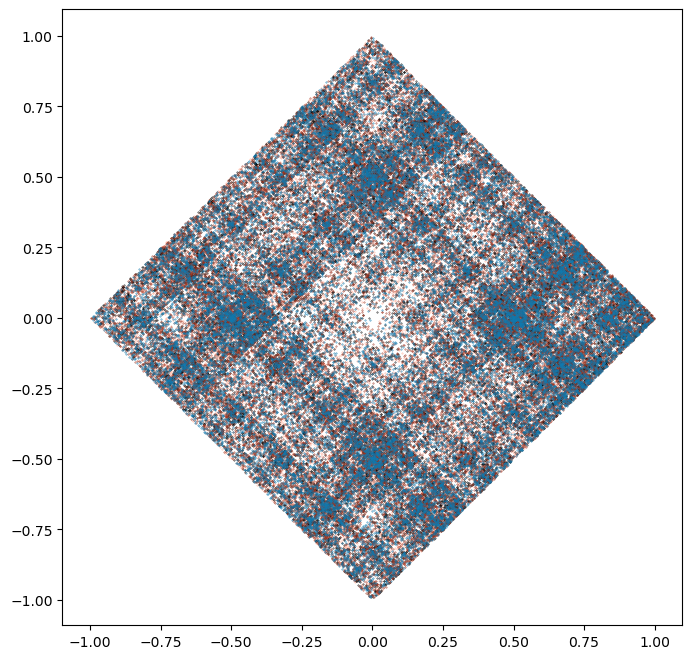

###  A Sierpinski pentagon variant


Wikipedia describes this variant as follows

> **Sierpinski's Pentagon (with constraint)**

> A point inside a pentagon repeatedly jumps half of the distance towards a randomly chosen vertex, but the currently chosen vertex cannot neighbor the previously chosen vertex if the two previously chosen vertices are the same.

We implement this constraint below (actually in two different ways).  The resulting pictures bear an astonishing resemblance to snowflakes.  One of the reasons people get excited about fractals and the like is that they are clean illustrations of how bewildering (and beautiful) complexity can emerge from a very simple iterative process, which appears to correspond to a variety of things we see in nature, such as snowflakes.

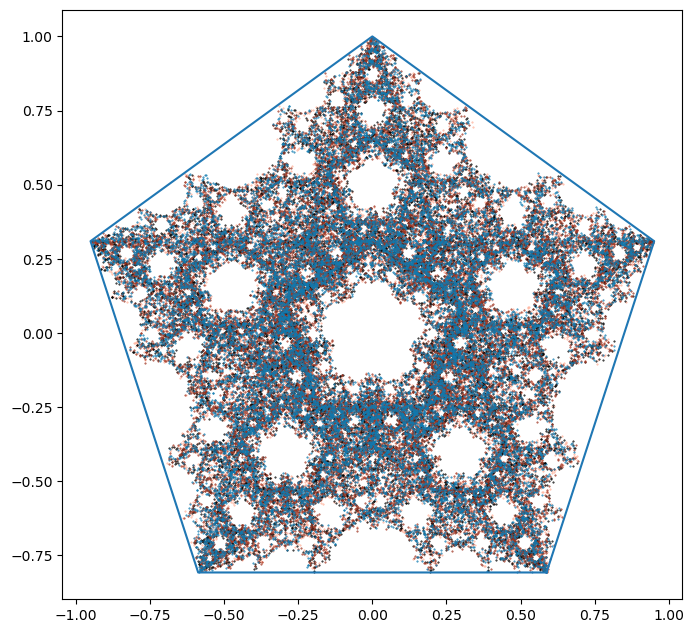

A comment on this picture.  Note that the outline of a 5-pointed star is visible.  These are all the lines connecting vertices to their non-neighbors, so under the non-neighors constraint, these appear to become strong attractors.

The next code block implements the same idea. In this implementation the logic of the loop  block is slightly different.

A similar but not identical snowflake is drawn. In particular there are now many points that lie on or very close
to edges.  The snowflake above appears to capture the Wikipedia drawing.  The one below is a reasonable interpretation of the idea described at the beginning of this section as **Sierpinski's Pentagon (with constraint)**, but some implementation decisions have been made differently.

This is a good illustration not only of how English is often inadequate for describing algorithms
but of how the way it falls short in explicitness is often not apparent until you start writing code.

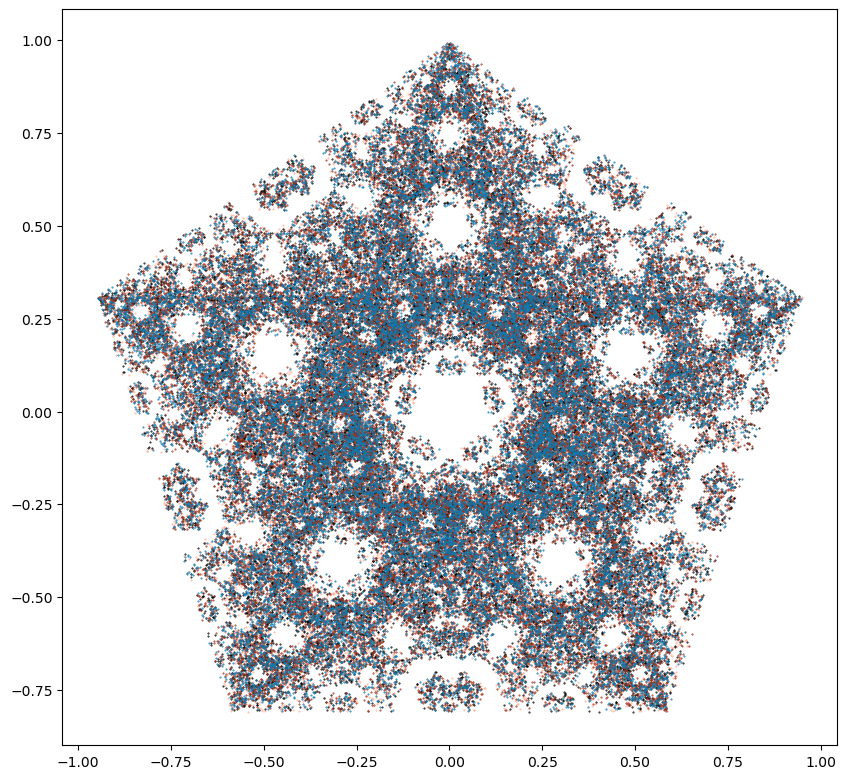

It may be a bit harder to see but the 5-pointed star is still there, an indication that the non-neighbors constraint is still having an effect.

Finally here's the lesser-known "Star of David" version of the Chaos Game above.  Just switch from a pentagon to a hexagon. The non-neighbors lines now form a Star of David.   Note that all kinds of other strange symbols begin to emerge.  Very Kabbalistic.

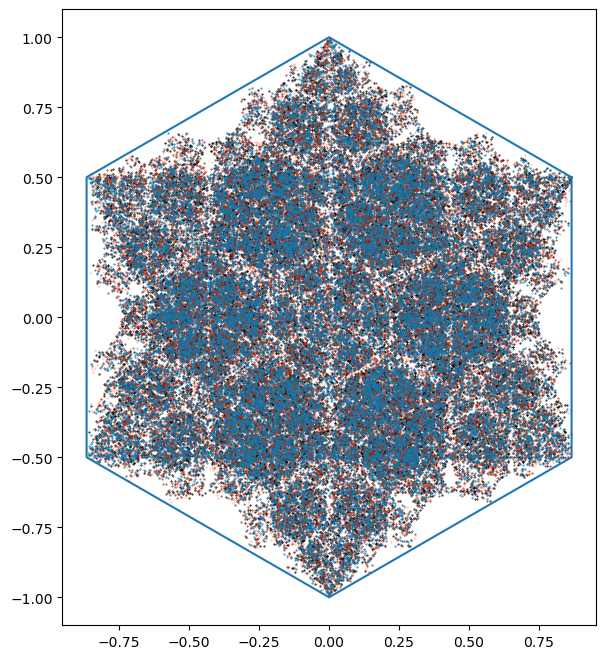

###  Barnaby's Fern

Thie next one is still a Chaos game in that the points of a fractal structure are generated in random order, but it has a somewhat different flavor in that there's no generating polygon whose vertices supply a container for the points.

We said above that  fractal structure occcurs many times in nature.
This one is known as Barnaby's Fern, which is a simple mathematical
process for generating a fern.  Note how each leaf on Barnaby's fern is a copy of the
entire fern.  The leaves on the copies are smaller copies.  Fractile
structure. Infinitely recursing.  In nature, the idea of recursing structure is carried out in compound leaves,
and one rank deeper, with twice-compound leaves.  There aren't any thrice compound
leaves, or any compound leaves at still higher ranks, we don't see the kind of bottomless fractility we saw
in Sierpinski sets or the Mandelbrot set, but the idea of limited fractal structure has some 
obvious practical benefits, such as more energy-producing surface area for the leaf,
made avaliable in easy to encode way.

Here's the rule expressed as the probabilities for 4 possible ways to map one $x,y$ point
point to another. Below that simple code that generates Barnaby's Fern, and the resulting plot, with some
coloring added.  Note that the coloring adds information about the order in which the points rae generated.
Yellow is the color used for the last $\frac{1}{4}$ of the points, so
the predominance of yellow at the tips of the rank 1 leaves means that those points were drawn later.  The frpnd grows outward.


$$
\begin{array}{l|l}
\text{Frequency} & \text{Action}\\
\hline
\text{85% of the time} &
\begin{array}{lcl}
x & \mapsto & 0.85 x + 0.04 y \\
y & \mapsto & −0.04 x + 0.85 y + 1.6
\end{array} 
\\
\hline
\text{7% of the time} &
\begin{array}{lcl}
x & \mapsto & 0.2 x − 0.26 y \\
y & \mapsto & 0.23 x + 0.22 y + 1.6
\end{array}
\\
\hline
\text{7% of the time} &
\begin{array}{lcl}
x & \mapsto & 0.15 x + 0.28 y \\
y & \mapsto & 0.26 x + 0.24 y + 0.44
\end{array}\\
\hline
\text{1% of the time} & \begin{array}{lcl}
x & \mapsto & 0 \\
y & \mapsto & 0.16 y
\end{array} \\
\hline
\end{array}
$$

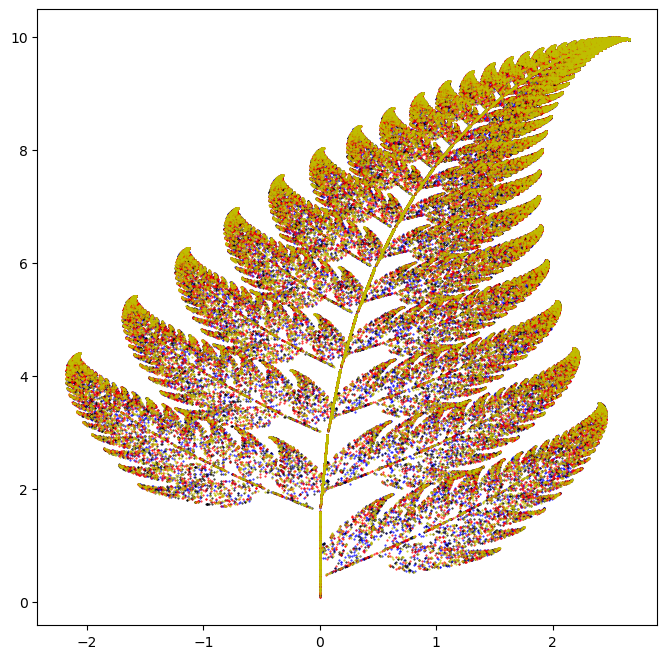

In [25]:
import random
import numpy as np
import random
from matplotlib import pyplot as plt 

def get_next22 (x,y):
    decider = random.random()
    if decider <= .85:
        return .85*x + .04*y, -.04*x + .85*y + 1.6
    elif decider <= .92:
        return .2*x - .26*y, .23*x + .22*y + 1.6
    elif decider <= .99:
        return -.15*x + .28*y, .26*x + .24*y + .44
    else:
        return 0,0.16*y
    
k = 120_000
pts = np.empty((k,2))
#Choose a random point in the unit square
x,y = random.random(), random.random()

for i in range(k):
    x,y =  get_next22(x,y)
    pts[i] = x,y


figsize=(8,8)
fig,ax= plt.subplots(1,1,figsize=figsize)
xs,ys = pts[:,0],pts[:,1]


#Most fall-like
cols = ("b","k","r","y")
#cols = ("xkcd:nice blue","k","xkcd:brick","xkcd:straw")
#cols = ("xkcd:pale salmon","k","xkcd:brick","xkcd:nice blue")
# color_scatter is defined earlier in the NB in the code given for the exercise.
color_scatter (xs,ys, cols, ax, k, s=.2)